# TP4 : Techniques avancées

Dans ce TP, vous allez mettre en pratique tout ce que vous avez appris !

Ce TP sera **À RENDRE** sur Moodle :
- Fichier notebook (`tp4.ipynb`) complété avec vos réponses
- Fichier `models_results.csv` détaillant les résultats de vos expérimentations (voir Exercice 1, Q5 et Q6)
- Fichier `predictions.csv` contenant les prédictions de votre meilleur modèle sur les données d'utilisation (voir Exercice 1, Q7)

Il comptera pour **5 points** dans votre note de TP de l'UE, principalement déterminé en fonction du F2-score de vos prédictions sur les données d'utilisation (dont vous n'aurez pas les labels...).
Exemple : vous obtenez un F2-score de 0.68 sur les données d'utilisation, vous obtiendrez $0.68 * 5 = 3.4$ points.

Le prof reste souverain et s'autorise à baisser ou invalider la note si votre fichier notebook (`tp4.ipynb`) contient de la triche et/ou ne correspond pas aux résultats que vous fournissez ! Soyez donc honnête :-)

Dans la limite de l'utilisation des données **de "prototypage"** fournies, vous êtes autorisés à utiliser toutes les techniques vues en cours : encodages, normalisations, équilibrages, suppression ou remplacement des données manquantes, ...

Les données dites "de déploiement" (ou d'utilisation) doivent être considérées comme inaccessibles : vous ne devrez les utiliser que pour faire vos prédictions finales. Comme si vous les receviez une fois votre modèle de ML entraîné et déployé sur un serveur.

Dans ce TP, on se place dans la situation de *data scientists* dans un hôpital. Vos collègues médecins essaient de détecter la présence d'une maladie cardiaque à partir de données sur les patients, obtenues par divers examens médicaux.

Votre responsable hiérarchique veut que vous entraîniez un modèle de ML qui sera capable de prédire la présence de cette maladie, afin d'accélérer le traitement des patients et d'éviter le recours à des examens complémentaires beaucoup plus coûteux.

On veut donc identifier le plus possible de patients malades (= maximiser le rappel !) pour laisser mourir le moins de patients possibles, tout en évitant de prédire les patients sains comme malade (= éviter que la précision ne soit de 0 !), sinon cela prendra trop de temps et coûtera trop cher... Nous utiliserons donc un F2-score comme métrique principale de sélection du meilleur modèle. Les autres métriques seront calculées et mémorisées à titre indicatif.

Description des données :

| Nom | Description |
|-----|-------------|
| age | Âge du patient en années |
| sex | Sexe du patient (`male` / `female`) |
| chest pain | Type de douleur dans la poitrine ressentie |
| resting blood pressure (mm Hg) | Pression sanguine au repos |
| cholestoral (mg/dl) | Taux de choléstérol dans le sang |
| fasting blood sugar > 120 mg/dl | Est-ce que le taux de glucose dans le sang après 8h à jeûn dépasse une valeur normale ? |
| resting electrocardiograph | Présence d'une anomalie à l'électrocardiographe (ECG) au repos (`normal` : pas d'anomalie, `abnormal` : anomalie ST-T, `hypertrophy` : probable hypertrophie du ventricule gauche) |
| max heart rate | Nombre maximum de battements cardiaques par minutes durant un exercice de résistance à l'effort (ex : vélo) |
| exercise induced angina | Est-ce que l'exercice de résistance à l'effort a entraîné une douleur à la poitrine ? |
| oldpeak | Dépression du segment ST de l'ECG lors de l'exercice de résistance à l'effort (relativement à l'ECG au repos) |
| slope | Forme du segment ST de l'ECG (`upsloping` : hausse, `flat` : plat, `downsloping` : baisse) |
| number of colored vessels by fluoroscopy | Le nombre d'artères majeures colorées par fluoroscopie (rayons X ou CT-scan) |
| thalassemia | Présence d'une maladie sanguine (`3` : normal, `6` : maladie irréversible, `7` : maladie réversible)
| **class** | **Cible de prédiction** : présence (`disease`) ou absence (`no disease`) d'un problème cardiaque |

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Exercice 1 - Prise en main des données et préparation des fichiers de réponses

J'attends un certain format dans vos fichiers de réponses (`models_results.csv` et `predictions.csv`) ; cet exercice va vous faire implémenter les fonctions permettant de remplir ces fichiers comme attendu.

Comme vu dans le CM4, lorsque l'on prototype et expérimente sur divers algorithmes de ML, il est important de retenir les scores obtenus pour chaque algorithme, chaque préparation de données, et chaque *seed* (graine aléatoire). Cela permettra de sélectionner le meilleur modèle une fois les expérimentations effectuées.

Q1. Chargez le fichier `data_prototyping.csv` dans un *DataFrame* `df`.

In [163]:
df = pd.read_csv('data_prototyping.csv')
df.head()

,age,sex,chest pain,resting blood pressure (mm Hg),cholestoral (mg/dl),fasting blood sugar > 120 mg/dl,resting electrocardiograph,max heart rate,exercise induced angina,oldpeak,slope,number of colored vessels by fluoroscopy,thalassemia,class
0,44,male,asymptomatic,120.0,169.0,no,normal,144,yes,2.8,downsloping,0,6,disease
1,36,male,non-anginal pain,130.0,209.0,no,normal,178,no,0.0,?,?,?,no disease
2,39,female,non-anginal pain,110.0,182.0,no,abnormal,180,no,0.0,?,?,?,no disease
3,48,male,asymptomatic,124.0,274.0,no,hypertrophy,166,no,0.5,flat,0,7,disease
4,36,male,non-anginal pain,150.0,160.0,no,normal,172,no,0.0,?,?,?,no disease


Q2. Faites une EDA minimale : quelles sont les colonnes, quels sont leurs types de données ? Quelles sont les valeurs uniques pour chaque colonne catégorielle ? Existe-t-il des valeurs manquantes ?

Vous ferez une EDA plus poussée dans l'Exercice 2.

In [164]:



df.replace('?', np.nan, inplace=True)


print("Types de données :")
print(df.dtypes)


print("\nValeurs uniques pour chaque colonne catégorielle :")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nColonne : {col}")
    print(df[col].unique())


print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())


Types de données :
age                                          int64
sex                                         object
chest pain                                  object
resting blood pressure (mm Hg)              object
cholestoral (mg/dl)                         object
fasting blood sugar > 120 mg/dl             object
resting electrocardiograph                  object
max heart rate                              object
exercise induced angina                     object
oldpeak                                     object
slope                                       object
number of colored vessels by fluoroscopy    object
thalassemia                                 object
class                                       object
dtype: object

Valeurs uniques pour chaque colonne catégorielle :

Colonne : sex
['male' 'female']

Colonne : chest pain
['asymptomatic' 'non-anginal pain' 'atypical angina' 'typical angina']

Colonne : resting blood pressure (mm Hg)
['120.0' '130.0' '110.0' '124.0' 

Q3. Séparez vos données en `df_train` + `df_test`. Vous êtes libre de choisir la proportion de données dans chaque jeu.

In [165]:
from sklearn.model_selection import train_test_split

# Séparer les données en df_train (80%) et df_test (20%)
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df['class'], random_state=42)


# Vérifier la taille des deux jeux de données
print(f"size de df_train : {df_train.shape}")
print(f"size de df_test : {df_test.shape}")


size de df_train : (367, 14)
size de df_test : (92, 14)


Q3. On veut préparer les données de manière à ce qu'elles soient utilisables par un algorithme de ML. Il existe plusieurs façons de les préparer, comme on l'a vu au TP2 (c'est subjectif !). Chaque façon peut donner des performances différentes ; certains algorithmes fonctionneront mieux avec certaines façons que d'autres...

Implémentez la fonction `prepare_data_v1(df)` qui prépare les données d'un *DataFrame* en entrée, de manière la plus simple possible : je recommande un **encodage ordinal** pour commencer et pouvoir tester rapidement vos algorithmes. Supprimez les colonnes contenant trop de NAs (>50%) pour simplifier également, ainsi que les lignes contenant au moins 1 NA.

**Attention** : on rappelle que cet encodage fait perdre toute capacité d'interprétation s'il est utilisé sur une variable qui n'a pas de relation d'ordre ! Certains algorithmes auront également de mauvaises performances car ils calculeront une relation statistique qui n'existe pas... Ce n'est pas grave pour cet exercice, cela permet de tester rapidement un algorithme sur nos données.

**Attention²** : Votre fonction devra fonctionner sur des sous-ensembles de données ! En effet, en pratique vous ne connaîtrez pas vos données d'utilisation avant d'avoir déployé votre modèle... Votre fonction de préparation devra donc être appliquée sur les données d'utilisations indépendamment des données de prototypage. Faites particulièrement attention à **l'ordre de vos encodages** ! Si votre fonction encode `normal=1, abnormal=2` dans vos données de prototypage, puis `abnormal=1, normal=2` dans vos données d'utilisation, votre modèle de ML prédira n'importe quoi... Je recommande de faire votre encodage à la main, en utilisant par exemple [`df.replace()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) pour vous assurer que l'encodage sera **cohérent**.

In [166]:
def prepare_data_v1(df):
    # Remplacer les '?' par NaN
    df.replace('?', np.nan, inplace=True)
    
    # Supprimer les colonnes avec plus de 50% de valeurs manquantes
    df = df.drop(columns=['thalassemia', 'slope'])
    
    # Supprimer les lignes avec des valeurs manquantes
    df = df.dropna()
    
    # Encodage ordinal pour les colonnes catégorielles
    if 'sex' in df.columns:
        df['sex'] = df['sex'].replace({'male': 1, 'female': 2})
    
    if 'chest pain' in df.columns:
        df['chest pain'] = df['chest pain'].replace({
            'typical angina': 1, 
            'atypical angina': 2, 
            'non-anginal pain': 3, 
            'asymptomatic': 4
        })
    
    if 'resting electrocardiograph' in df.columns:
        df['resting electrocardiograph'] = df['resting electrocardiograph'].replace({'normal': 1, 'abnormal': 2, 'hypertrophy': 3})
    
    if 'fasting blood sugar > 120 mg/dl' in df.columns:
        df['fasting blood sugar > 120 mg/dl'] = df['fasting blood sugar > 120 mg/dl'].replace({'yes': 1, 'no': 0})
    
    if 'exercise induced angina' in df.columns:
        df['exercise induced angina'] = df['exercise induced angina'].replace({'yes': 1, 'no': 0})
    
    if 'slope' in df.columns:
        df['slope'] = df['slope'].replace({'upsloping': 1, 'flat': 2, 'downsloping': 3})
    
    if 'thalassemia' in df.columns:
        df['thalassemia'] = df['thalassemia'].replace({3: 1, 6: 2, 7: 3})

    if 'thalassemia' not in df.columns:
        df['thalassemia'] = 1
    
    if 'class' in df.columns:
        df['class'] = df['class'].replace({'disease': 1, 'no disease': 0})
    
    # Convertir les colonnes numériques (qui sont encore de type object) en numérique
    cols_to_convert = ['resting blood pressure (mm Hg)', 'cholestoral (mg/dl)', 'max heart rate', 'oldpeak']
    for col in cols_to_convert:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # S'assurer qu'il ne reste pas de colonnes catégorielles non encodées
    df = df.apply(pd.to_numeric, errors='coerce')
    
    return df


Si vous avez bien séparés vos données et implémenté la fonction de préparation, la prochaine cellule devrait s'exécuter sans problème. Notez bien que les données de test ne sont pas préparées en même temps que les données d'entraînement !

In [167]:
df_train_v1, df_test_v1 = prepare_data_v1(df_train), prepare_data_v1(df_test)

C:\Users\Souad Gouriach\AppData\Local\Temp\ipykernel_11548\857849322.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 1, 'female': 2})
C:\Users\Souad Gouriach\AppData\Local\Temp\ipykernel_11548\857849322.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['chest pain'] = df['chest pain'].replace({
C:\Users\Souad Gouriach\AppData\Local\Temp\ipykernel_11548\857849322.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

Q5. Implémentez la méthode `evaluate_model(df_train, df_test, data_name, model_name, model_class, hyperparameters)`. Cette méthode devra instancier un estimateur (`model_class`) avec les hyperparamètres demandés, l'entraîner sur les données d'entraînement fournies, puis calculer les métriques suivantes sur les données de test fournies :

- F2-score
- Accuracy
- Precision
- Recall

Vous pouvez utiliser les méthodes de Scikit-learn pour ces [métriques](https://scikit-learn.org/stable/api/sklearn.metrics.html) (attention à la classe d'intérêt ! Par défaut, Scikit utilise `1` comme classe d'intérêt, mais vous pouvez en spécifier une autre via l'argument `pos_label`).

Votre fonction devra renvoyer un *DataFrame* contenant les colonnes suivantes :
- ModelName : le nom du modèle utilisé (algorithme)
- Data : le nom de la méthode de préparation des données
- Hyperparamètres : le dictionnaire des hyperparamètres
- RandomSeed : la graine aléatoire utilisée pour instancier et entraîner le modèle
- Score_f2 : la métrique de F2-Score sur les prédictions de test
- Score_precision : la métrique de Precision sur les prédictions de test
- Score_recall : la métrique de Rappel sur les prédictions de test
- Score_accuracy : la métrique d'Accuracy (% de prédictions correctes) sur les prédictions de test
- TrainedEstimator : l'instance du modèle entraînée (pour réutilisation ultérieure si besoin)


On vous donne le squelette de cette fonction, à vous de remplir les trous !

```python
def evaluate_model(df_train, df_test, data_name, model_name, model_class, hyperparameters):
    X_train = # À COMPLÉTER
    Y_train = # À COMPLÉTER
    X_test = # À COMPLÉTER
    Y_test = # À COMPLÉTER

    # On génère une graine aléatoire ... de manière aléatoire :-)
    seed = np.random.randint(0, 2**32 - 1)
    np.random.seed(seed)

    # On instancie l'algorithme avec les hyperparamètres demandés
    # En pratique, si on a par exemple `model_class=LogisticRegression` et
    # # `hyperparameters={ 'n_iter': 100, 'eta0': 0.1 }`, c'est équivalent à faire
    # `LogisticRegression(n_iter=100, eta0=0.1)`
    estimator = model_class(**hyperparameters)

    # À COMPLÉTER : entraînez le modèle !
    
    y_pred = # À COMPLÉTER : calculez les prédictions sur les données de test

    return pd.DataFrame([{
        'ModelName': model_name,
        'Data': data_name,
        'Hyperparameters': hyperparameters,
        'RandomSeed': seed,
        'Score_f2': # À COMPLÉTER
        'Score_precision': # À COMPLÉTER
        'Score_recall': # À COMPLÉTER
        'Score_accuracy': # À COMPLÉTER
        'TrainedEstimator': estimator
    }])
```

In [168]:
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
import numpy as np
import pandas as pd

def evaluate_model(df_train, df_test, data_name, model_name, model_class, hyperparameters):
    # Séparer les données en X (caractéristiques) et Y (labels)
    X_train = df_train.drop(columns=['class'])
    Y_train = df_train['class']
    X_test = df_test.drop(columns=['class'])
    Y_test = df_test['class']
    
    # Générer une graine aléatoire
    seed = np.random.randint(0, 2**31 - 1)
    np.random.seed(seed)
    
    # Instancier l'algorithme avec les hyperparamètres demandés
    estimator = model_class(**hyperparameters)
    
    # Entraîner le modèle
    estimator.fit(X_train, Y_train)
    
    # Calculer les prédictions sur les données de test
    y_pred = estimator.predict(X_test)
    
    # Calculer les métriques
    score_f2 = fbeta_score(Y_test, y_pred, beta=2, pos_label=1)  # F2-score
    score_precision = precision_score(Y_test, y_pred, pos_label=1)  # Précision
    score_recall = recall_score(Y_test, y_pred, pos_label=1)  # Rappel
    score_accuracy = accuracy_score(Y_test, y_pred)  # Accuracy (Exactitude)
    
    # Retourner un DataFrame avec les résultats
    return pd.DataFrame([{
        'ModelName': model_name,
        'Data': data_name,
        'Hyperparameters': hyperparameters,
        'RandomSeed': seed,
        'Score_f2': score_f2,
        'Score_precision': score_precision,
        'Score_recall': score_recall,
        'Score_accuracy': score_accuracy,
        'TrainedEstimator': estimator
    }])


Si vous avez bien implémenté la fonction `evaluate_model()` et que vos données sont bien préparées, l'expérimentation ci-dessous devrait fonctionner et vous afficher le résultat d'une Régression Logistique (sur des données préparées "naïvement").

In [169]:
from sklearn.linear_model import LogisticRegression

# `'v1'` réfère à la fonction `prepare_data_v1`
results = evaluate_model(
    df_train_v1,
    df_test_v1,
    'v1',
    'LogisticRegression',
    LogisticRegression,
    {'penalty': None, 'max_iter': 1000},
)

results

c:\Users\Souad Gouriach\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,ModelName,Data,Hyperparameters,RandomSeed,Score_f2,Score_precision,Score_recall,Score_accuracy,TrainedEstimator
0,LogisticRegression,v1,"{'penalty': None, 'max_iter': 1000}",865118253,0.375,0.75,0.333333,0.837209,"LogisticRegression(max_iter=1000, penalty=None)"


Q6. Enregistrez les résultats de l'expérimentation ci-dessus dans un fichier `models_results.csv`.

On vous donne, pour vous aider, une fonction qui ajoute automatiquement les résultats sans effacer les précédents ! :-)

Note : il est très important d'enregistrer vos résultats à chaque expérimentation, pour ne pas "perdre" ces résultats, en particulier si vous redémarrez votre notebook. Dans la suite du TP, utilisez cette fonction **chaque fois** que vous faites une nouvelle expérimentation ! En pratique, on utilise souvent des outils dédiés tels que ceux présentés en cours (MLFlow, Weights and Biases, Aimstack, ...).

Le fichier `models_results.csv` sera à rendre.

In [171]:
def append_results(results):
    with open('models_results.csv', 'a') as f:
        # Quand le fichier est vide, il faut préciser les colonnes ;
        # si on a au moins une ligne, il ne faut pas répéter les noms des colonnes...
        header = f.seek(0, 2) == 0
        # On ne veut pas écrire la colonne `TrainedEstimator` (c'est un objet Python !)
        columns = [
            'ModelName', 'Data', 'Hyperparameters', 'RandomSeed', 'Score_f2', 
            'Score_precision', 'Score_recall', 'Score_accuracy',
        ]
        results.to_csv(f, header=header, columns=columns, index=False)

In [172]:
# Après avoir exécuté l'évaluation du modèle
results = evaluate_model(
    df_train_v1,
    df_test_v1,
    'v1',
    'LogisticRegression',
    LogisticRegression,
    {'penalty': 'l2', 'max_iter': 1000}
)

# Enregistrer les résultats
append_results(results)


c:\Users\Souad Gouriach\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Q7. Pour vous montrer ce qu'on attend pour les prédictions à rendre, faites les prédictions sur le modèle de Régression Logistique de la précédente expérimentation, sur les données "de déploiement", préparées via la façon 'v1'.

On vous fournit une fonction pour écrire les prédictions dans un fichier `predictions.csv`.

**Attention** : dans la suite du TP, vous ne devrez faire les prédictions sur ces données de déploiement que pour votre meilleur modèle et votre meilleure préparation de données ! De toute façon vous n'aurez pas les labels, donc vous ne saurez pas si vos prédictions sont bonnes ou non...

1. Récupérez le modèle entraîné (`TrainedEstimator`) de votre meilleure expérimentation (pour l'instant vous n'en avez qu'une seule : `results`). Si vous redémarrez le notebook d'ici la fin du TP, vous devriez avoir toutes les informations dans le fichier `models_results.csv` (la classe à utiliser, la fonction de préparation de données, les hyperparamètres, et la *seed* aléatoire) pour ré-entraîner le même modèle.
2. Puis, appelez la fonction `write_predictions()` avec en paramètre votre fonction de préparation de données (ici, `prepare_data_v1`) et votre modèle entraîné.

Cette fonction se charge automatiquement de lire les données, les préparer, faire les prédictions, et les écrire dans le fichier de sortie `predictions.csv`. Elle gère également les prédictions manquantes si votre fonction de préparations de données supprime des lignes (NAs).

Le fichier `predictions.csv` sera à rendre.

In [174]:
def write_predictions(prepare_data_function, estimator):
    df_deployment = pd.read_csv('data_deployment.csv')
    df_deployment_prepared = prepare_data_function(df_deployment)
    # /!\ Si la fonction de préparation des données supprime des lignes
    # (par exemple à cause de la gestion des NAs), on va se retrouver 
    # avec moins de prédictions qu'on a de lignes...
    # On doit matcher chaque prédiction avec sa ligne correspondante
    handled_lines = df_deployment_prepared.index

    # On prédit pour chaque ligne des données préparées
    predictions = estimator.predict(df_deployment_prepared)
    # On ré-assimile aux numéros de lignes des données originales
    predictions = pd.Series(predictions, index=handled_lines)

    # On ajoute la colonne aux données originales ; puisqu'on a indexé les
    # prédictions, les prédictions manquantes seront automatiquement remplacées par NaN
    df_deployment['predictions'] = predictions
    # On écrit le fichier
    df_deployment.to_csv('predictions.csv', index=True)
    # Réutilisation du modèle de la question précédente


In [175]:
# Réutilisation du modèle de la question précédente
best_model = results['TrainedEstimator'].iloc[0]

# Écriture des prédictions sur le fichier 'predictions.csv'
write_predictions(prepare_data_v1, best_model)


C:\Users\Souad Gouriach\AppData\Local\Temp\ipykernel_11548\857849322.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male': 1, 'female': 2})
C:\Users\Souad Gouriach\AppData\Local\Temp\ipykernel_11548\857849322.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['chest pain'] = df['chest pain'].replace({
C:\Users\Souad Gouriach\AppData\Local\Temp\ipykernel_11548\857849322.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain 

## Exercice 2 : à vous de jouer !

Vous êtes maintenant libres de vos choix pour identifier le meilleur modèle et la meilleure préparation de données !

N'oubliez pas d'enregistrer chaque expérimentation via la méthode `append_results()`.

**Attention** : une fois que vous avez expérimenté avec une façon de préparer de vos données (par exemple, `prepare_data_v1()`), vous NE DEVEZ PLUS modifier cette fonction ! Sinon, vous rendez irreproductibles toutes vos expérimentations précédentes ! Dans la pratique, on utilise souvent des Data Version Control (DVC) et des Version Control System (VCS, exemple : Git) pour s'assurer de mémoriser ce qu'on a fait et de pouvoir y revenir.

Vous devrez donc implémenter des fonctions `prepare_data_v2()`, `prepare_data_v3()`, etc. (autant que nécessaires pour tester toutes vos idées) !

On vous donne quelques pistes d'exploration ci-dessous pour vous aider ...
Les questions suivantes sont données à titre d'indication, vous n'êtes pas obligés de toutes les faire, ni de suivre cet ordre.

Q1. Faites une EDA plus poussée. Quelles sont les données catégorielles ? Quelles valeurs peuvent-elles prendre ? Existe-t-il des données manquantes ?

Astuce : les types de données que Pandas vous retourne peuvent ne pas être cohérents ! Vérifiez avec la description des données fournie pour détecter si des colonnes devraient plutôt avoir un autre type.

Colonnes catégorielles :
Valeurs uniques de sex : ['male' 'female']
Valeurs uniques de chest pain : ['asymptomatic' 'non-anginal pain' 'atypical angina' 'typical angina']
Valeurs uniques de resting blood pressure (mm Hg) : ['120.0' '130.0' '110.0' '124.0' '150.0' '105.0' '178.0' '122.0' '140.0'
 '94.0' '170.0' '138.0' <NA> '180.0' '125.0' '128.0' '112.0' '104.0'
 '155.0' '100.0' '160.0' '200.0' '115.0' '145.0' '134.0' '135.0' '118.0'
 '98.0' '106.0' '114.0' '142.0' '136.0' '132.0' '190.0' '152.0' '102.0'
 '101.0' '108.0' '126.0' '148.0' '146.0' '154.0' '129.0' '113.0' '185.0'
 '172.0' '127.0']
Valeurs uniques de cholestoral (mg/dl) : ['169.0' '209.0' '182.0' '274.0' '160.0' '240.0' '270.0' '204.0' '213.0'
 '194.0' '220.0' '224.0' '256.0' '199.0' '288.0' '236.0' '195.0' '230.0'
 '227.0' '275.0' '0.0' '175.0' '214.0' '284.0' '184.0' '219.0' '255.0'
 '237.0' '342.0' '335.0' '358.0' '260.0' '126.0' '258.0' '251.0' '246.0'
 '173.0' '216.0' '208.0' '226.0' '248.0' '207.0' '223.0' '241.0' '21

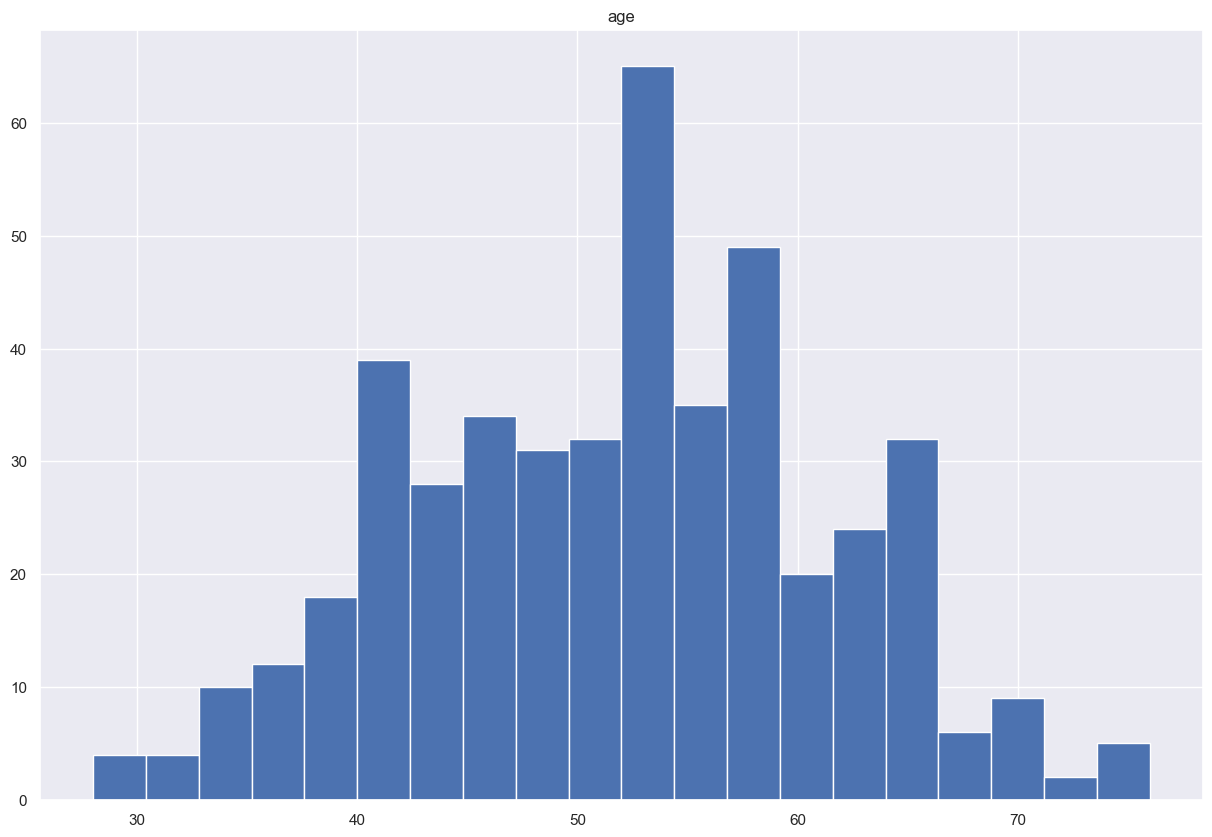

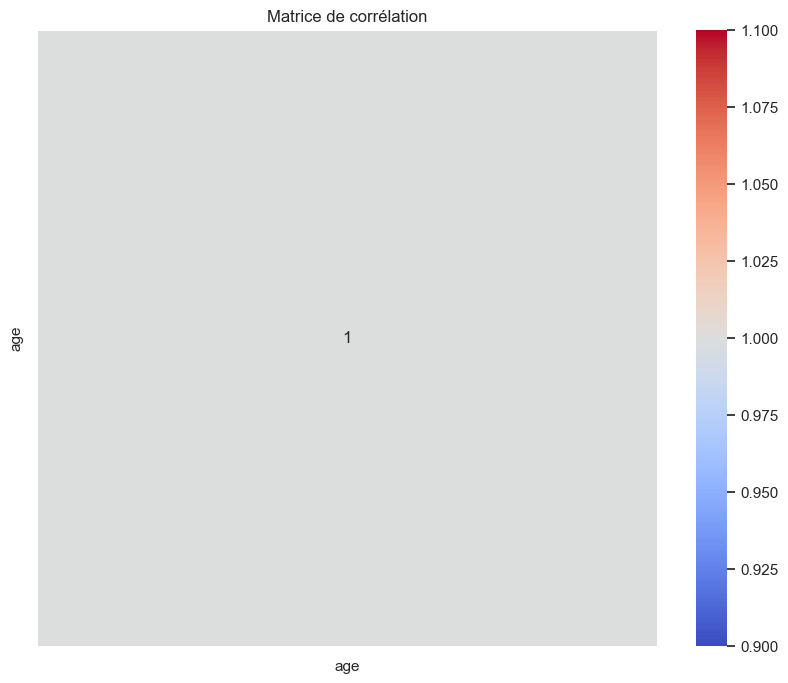

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('data_prototyping.csv')

# Remplacer les '?' par NaN pour les valeurs manquantes
df.replace('?', pd.NA, inplace=True)

# EDA sur les colonnes catégorielles
print("Colonnes catégorielles :")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"Valeurs uniques de {col} : {df[col].unique()}")

# EDA sur les colonnes numériques
print("\nStatistiques descriptives des colonnes numériques :")
print(df.describe())

# Compter les valeurs manquantes
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# Visualisation des distributions des colonnes numériques
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric.hist(figsize=(15, 10), bins=20)
plt.show()

# Affichage des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()


Q2. L'encodage ordinal est un moyen rapide de tester un algorithme (prototypage), mais qui montre vite ses limites, surtout pour les données sans relation d'ordre. Quels autres encodages pouvez-vous utiliser ?

Astuce : il vaut peut-être le coup d'essayer plusieurs formes d'encodages pour voir l'impact sur les performances...

On rappelle quelques méthodes d'encodage :

- Encodage ordinal
- Encodage one-hot
- Encodage binaire

In [188]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

def prepare_data_v2(df):
    # Remplacer les '?' par NaN
    df.replace('?', pd.NA, inplace=True)
    
    # Supprimer les colonnes ayant trop de valeurs manquantes (ex. slope, number of colored vessels by fluoroscopy, thalassemia)
    df = df.drop(columns=['thalassemia', 'slope', 'number of colored vessels by fluoroscopy'])
    
    # Imputer les valeurs manquantes pour les colonnes numériques avec la moyenne
    numeric_columns = ['resting blood pressure (mm Hg)', 'cholestoral (mg/dl)', 'max heart rate', 'oldpeak']
    imputer = SimpleImputer(strategy='mean')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    
    # Encodage One-Hot pour les colonnes catégorielles
    categorical_cols = ['sex', 'chest pain', 'resting electrocardiograph', 'fasting blood sugar > 120 mg/dl', 'exercise induced angina']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    # Supprimer les lignes avec des valeurs manquantes restantes (si existant)
    df = df.dropna()
    
    return df

# Appliquer la nouvelle préparation de données
df_train_v2, df_test_v2 = prepare_data_v2(df_train), prepare_data_v2(df_test)


Q3. Quelles sont les échelles de chaque colonne numérique (valeurs min vs max) ? Quelles sont les distributions de ces colonnes ? Quelles normalisations pouvez-vous utiliser ?

Astuce : il vaut peut-être le coup d'essayer plusieurs formes de normalisations pour voir l'impact sur les performances...

On rappelle quelques méthodes de normalisation :
- Linéaire (min-max)
- Z-score
- Log

Vous pouvez utiliser du *clipping* en plus de chacune des méthodes de normalisation.

In [203]:
from sklearn.ensemble import RandomForestClassifier
# Importer les fonctions nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# Préparer les données avec prepare_data_v2()
from sklearn.neighbors import KNeighborsClassifier
# Étape 1 : Importer les bibliothèques nécessaires
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, fbeta_score

param_dist_knn = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Nombre de voisins à considérer
    'weights': ['uniform', 'distance'],  # Poids des voisins
    'p': [1, 2]  # Distance de Minkowski (1 pour Manhattan, 2 pour Euclidean)
}

# Définir un scorer basé sur le F2-score
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1)

# Créer le modèle SVM
knn_model = KNeighborsClassifier()

# RandomizedSearchCV pour ajuster les hyperparamètres
random_search_knn = RandomizedSearchCV(
    knn_model,  # Modèle k-NN
    param_distributions=param_dist_knn,  # Espace de recherche des hyperparamètres
    n_iter=10,  # Nombre d'itérations aléatoires
    scoring=f2_scorer,  # Utiliser F2-score comme métrique principale
    cv=5,  # Validation croisée
    verbose=1,  # Afficher les informations de progression
    random_state=42,  # Pour la reproductibilité
    n_jobs=-1  # Utiliser tous les cœurs disponibles pour accélérer
)
# Ajuster le modèle SVM sur les données d'entraînement préparées
random_search_knn.fit(df_train_v2.drop(columns='class'), df_train_v2['class'])

# Meilleurs hyperparamètres trouvés
best_params_knn = random_search_knn.best_params_
print("Meilleurs hyperparamètres trouvés pour k-NN : ", best_params_knn)

# Évaluer le modèle SVM avec les meilleurs hyperparamètres
best_knn_model = random_search_knn.best_estimator_


df_train_v2, df_test_v2 = prepare_data_v2(df_train), prepare_data_v2(df_test)

# Évaluer le modèle Logistic Regression avec la nouvelle préparation de données
results_knn_tuned_v2 = evaluate_model(
    df_train_v2,
    df_test_v2,
    'v2',  # Nom de la méthode de préparation des données
    'kNN_Tuned',  # Nom du modèle
    KNeighborsClassifier,  # Classe du modèle
    best_params_knn  # Utiliser les meilleurs hyperparamètres trouvés
)



# Fonction pour ajouter les résultats dans le fichier CSV
def append_results(results):
    with open('models_results.csv', 'a') as f:
        header = f.seek(0, 2) == 0  # Ajouter les colonnes uniquement si le fichier est vide
        columns = [
            'ModelName', 'Data', 'Hyperparameters', 'RandomSeed', 
            'Score_f2', 'Score_precision', 'Score_recall', 'Score_accuracy'
        ]
        results.to_csv(f, header=header, columns=columns, index=False)

# Enregistrer les résultats dans le fichier models_results.csv
append_results(results_knn_tuned_v2)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs hyperparamètres trouvés pour k-NN :  {'weights': 'uniform', 'p': 1, 'n_neighbors': 7}


c:\Users\Souad Gouriach\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Q4. Existe-t-il des données manquantes ? Quelles colonnes ont beaucoup de données manquantes ? Combien de lignes possèdent au moins une valeur manquante ?

**Attention** : si votre fonction de préparation de données supprime les lignes contenant 1 valeur manquante (NA), vous allez supprimer des lignes du jeu de données "de déploiement" (ou d'utilisation). Ce qui veut dire que vous ne ferez pas de prédictions sur ces lignes, ce qui baissera forcément votre score ! Durant la phase d'entraînement, on peut se permettre de supprimer les valeurs manquantes si on pense qu'elles vont empêcher l'apprentissage ; mais, en déploiement, quand votre modèle sera utilisé par des personnes extérieures, vous pouvez difficilement vous permettre de rejeter des entrées... (Ou alors, vous risquez que vos utilisateurs finissent par ne plus utiliser votre modèle)

Vous pouvez essayer de supprimer les données manquantes, ou de les remplacer...

On rappelle quelques méthodes de remplacement :
- Par un valeur "sentinelle" indiquant une absence (par exemple, `-1`)
- Par moyenne, médiane, ou mode (valeur fixe)
- Par *forward-fill* ou *backward-fill*
- Par apprentissage non-supervisé

Les méthodes par valeur fixe (moyenne, médiane, mode) ou par données existantes (forward-fill, backward-fill) peuvent être utilisées en corrélation avec d'autres colonnes, par exemple en faisant un `groupby`.

In [225]:
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd

def prepare_data_v3(df):
    # Replace '?' with NaN
    df.replace('?', np.nan, inplace=True)
    
    # Drop columns with too many missing values
    df = df.drop(columns=['thalassemia', 'slope', 'number of colored vessels by fluoroscopy'])
    
    # Select the numeric columns
    numeric_columns = ['resting blood pressure (mm Hg)', 'cholestoral (mg/dl)', 'max heart rate', 'oldpeak']
    
    # Convert numeric columns to float (to ensure correct handling of missing values)
    df[numeric_columns] = df[numeric_columns].astype(float)
    
    # Imputation for missing values using the median for numeric columns
    imputer = SimpleImputer(strategy='median')
    df[numeric_columns] = imputer.fit_transform(df[numeric_columns])
    
    # Standard scaling for numerical columns
    scaler = StandardScaler()
    df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
    
    # One-Hot Encoding for categorical columns
    categorical_cols = ['sex', 'chest pain', 'resting electrocardiograph', 'fasting blood sugar > 120 mg/dl', 'exercise induced angina']
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
    
    # Drop any remaining rows with missing values (if any exist)
    df = df.dropna()
    
    return df

# Appliquer la nouvelle préparation de données améliorée
df_train_v3, df_test_v3 = prepare_data_v3(df_train), prepare_data_v3(df_test)


Q5. On a essayé une Régression Logistique, mais il existe d'autres algorithmes de classification ! Lesquels paraissent intéressants pour cette tâche ?
Comparez ces algorithmes, sur vos différentes façons de préparer vos données.

In [227]:
from sklearn.ensemble import RandomForestClassifier
# Importer les fonctions nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# Préparer les données avec prepare_data_v2()
from sklearn.neighbors import KNeighborsClassifier
# Étape 1 : Importer les bibliothèques nécessaires
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.ensemble import AdaBoostClassifier
# Import the Gradient Boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
'''param_grid = {
    'n_estimators': [200, 300, 400],  # Try larger values for n_estimators
    'max_depth': [15, 20, 25],  # Increase the depth
    'min_samples_split': [2, 5, 10],  # Adjust splitting criteria
    'min_samples_leaf': [1, 2, 4],  # Adjust leaf size
    'max_features': ['sqrt', 'log2', None],  # Control number of features at each split
    'bootstrap': [True, False],  # Test bootstrap vs no bootstrap
    'class_weight': ['balanced'],  # Keep balanced class weight
    'random_state': [42]
}
rf_model = RandomForestClassifier()

# Define RandomizedSearchCV with F2-score as scoring metric
random_search_rf = RandomizedSearchCV(
    rf_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of random combinations to try
    scoring=make_scorer(fbeta_score, beta=2, pos_label=1),  # Focus on F2-score
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV on the training data
random_search_rf.fit(df_train_v3.drop(columns='class'), df_train_v3['class'])

# Get the best hyperparameters
best_rf_params = random_search_rf.best_params_
print("Best hyperparameters for RandomForest: ", best_rf_params)

# Evaluate the best model on the test set
best_rf_model = random_search_rf.best_estimator_

# Ensure that the function `evaluate_model` is available
results_rf_optimized = evaluate_model(
    df_train_v3,
    df_test_v3,
    'v3_Optimized',  # Mark this as an optimized run
    'RandomForest_Optimized',  # Name of the model
    RandomForestClassifier,  # Model class
    best_rf_params  # Best hyperparameters found
)

# Save the results
append_results(results_rf_optimized)


# Afficher les résultats pour analyse''''''AdaBoostClassifier'''
def write_predictions(prepare_data_function, estimator):
    df_deployment = pd.read_csv('data_deployment.csv')
    df_deployment_prepared = prepare_data_function(df_deployment)
    handled_lines = df_deployment_prepared.index
    
    # Make predictions for each prepared row
    predictions = estimator.predict(df_deployment_prepared)
    predictions = pd.Series(predictions, index=handled_lines)
    
    # Add the predictions to the original data
    df_deployment['predictions'] = predictions
    df_deployment.to_csv('predictionsss.csv', index=True)

# Step 4: Train the best RandomForest model with the best hyperparameters
best_params = {
    'n_estimators': 200,
    'min_samples_split': 10,
    'min_samples_leaf': 2,
    'max_depth': 25,
    'max_features': 'sqrt',
    'class_weight': 'balanced',
    'bootstrap': False,
    'random_state': 42
}

# Prepare the training and test data
df_train_v3, df_test_v3 = prepare_data_v3(df_train), prepare_data_v3(df_test)

# Train and evaluate the best RandomForest model
results_rf_optimized = evaluate_model(
    df_train_v3,
    df_test_v3,
    'v3_Optimized',  # Name the data prep version
    'RandomForest_Optimized',  # Name the model
    RandomForestClassifier,  # Model class
    best_params  # Best hyperparameters found
)

# Append the results to models_results.csv
append_results(results_rf_optimized)

# Get the best trained model
best_model = results_rf_optimized['TrainedEstimator'].iloc[0]

# Write predictions for the deployment data
write_predictions(prepare_data_v3, best_model)



Q6. Chaque algorithme possède un certain nombre d'hyperparamètres, impactant les performances. Comparez les performances de différents hyperparamètres, pour chaque modèle.

La documentation de Scikit-learn liste les hyperparamètres dans le constructeur de chaque algorithme. Attention : cette liste est souvent plus étoffée que celle vue en cours, car Scikit propose des optimisations, mais laisse la configuration de ces optimisations au choix des utilisateurs...

Q7. Quelle est la fréquence de chaque classe ? Vous pouvez essayer de ré-équilibrer les données pour améliorer les performances.

On rappelle quelques méthodes de ré-équilibrage :
- *Downsampling* : diminution de la classe majoritaire jusqu'à atteindre la même proportion que la classe minoritaire.
- *Upsampling* : répétition des individus de la classe minoritaire jusqu'à atteindre la même proportion que la classe majoritaire.
- *Loss weighting* : on peut pondérer la fonction de *loss* pour rendre les erreurs sur la classe minoritaire plus coûteuses. Attention : cela suppose que la distribution des classes dans les données d'utilisation seront les mêmes ! Dans la pratique, vous ne pouvez pas en être certains...
- Génération de données : on peut générer des données similaires aux données existantes, en espérent qu'elles soient suffisamment proches pour qu'elles représentent bien le phénomène que l'on cherche à modéliser. Attention : dans la pratique, c'est compliqué de générer des données pour modéliser un phénomène, sans avoir un modèle du phénomène ...

Q7. Dans la fonction `evaluate_model()`, on vous fait initialement mesurer les performances de votre modèle sur les données de test. Or, en comparant les modèles sur ces données, on risque de choisir un modèle qui est trop spécialisé sur ces données, mais qui ne saura pas généraliser aux données d'utilisation ! On a vu en cours une technique pour éviter ce problème : la *cross-validation*. Vous pouvez implémenter une autre fonction `evaluate_model_cv()` qui suit le même principe mais qui utilise la *cross-validation* pour comparer les modèles.

Astuce : votre fonction peut évaluer plusieurs modèles et retourner un *DataFrame* contenant plusieurs résultats, avec `pd.DataFrame([ {...}, {...}, {...} ])`, où chaque `{...}` est un dictionnaire comme celui de la fonction `evalute_model()`. Cela permettrait d'évaluer les modèles sur les mêmes *folds* de la *cross-validation*.

## N'oubliez pas de mettre à jour vos fichiers `models_results.csv` et `predictions.csv` !!!

- `models_results.csv` à chaque expérimentation effectuée ;
- et `predictions.csv` une fois votre meilleur modèle identifié.

Ces fichiers sont à rendre sur Moodle avec votre fichier `tp4.ipynb`.